In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
df['Med_Val(K)'] = dataset.target

In [5]:
dataset.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
Med_Val(K)    506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Med_Val(K)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

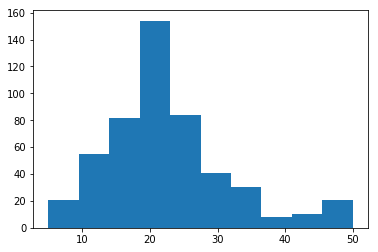

In [8]:
plt.hist(df['Med_Val(K)'])

In [9]:
bin = [0, 17, 21,25,100]
labels = [1, 2, 3, 4]

In [10]:
df['Med_Val_Bin'] = pd.cut(df['Med_Val(K)'],bin,labels=labels)

/anaconda3/envs/base_py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/envs/base_py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/envs/base_py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

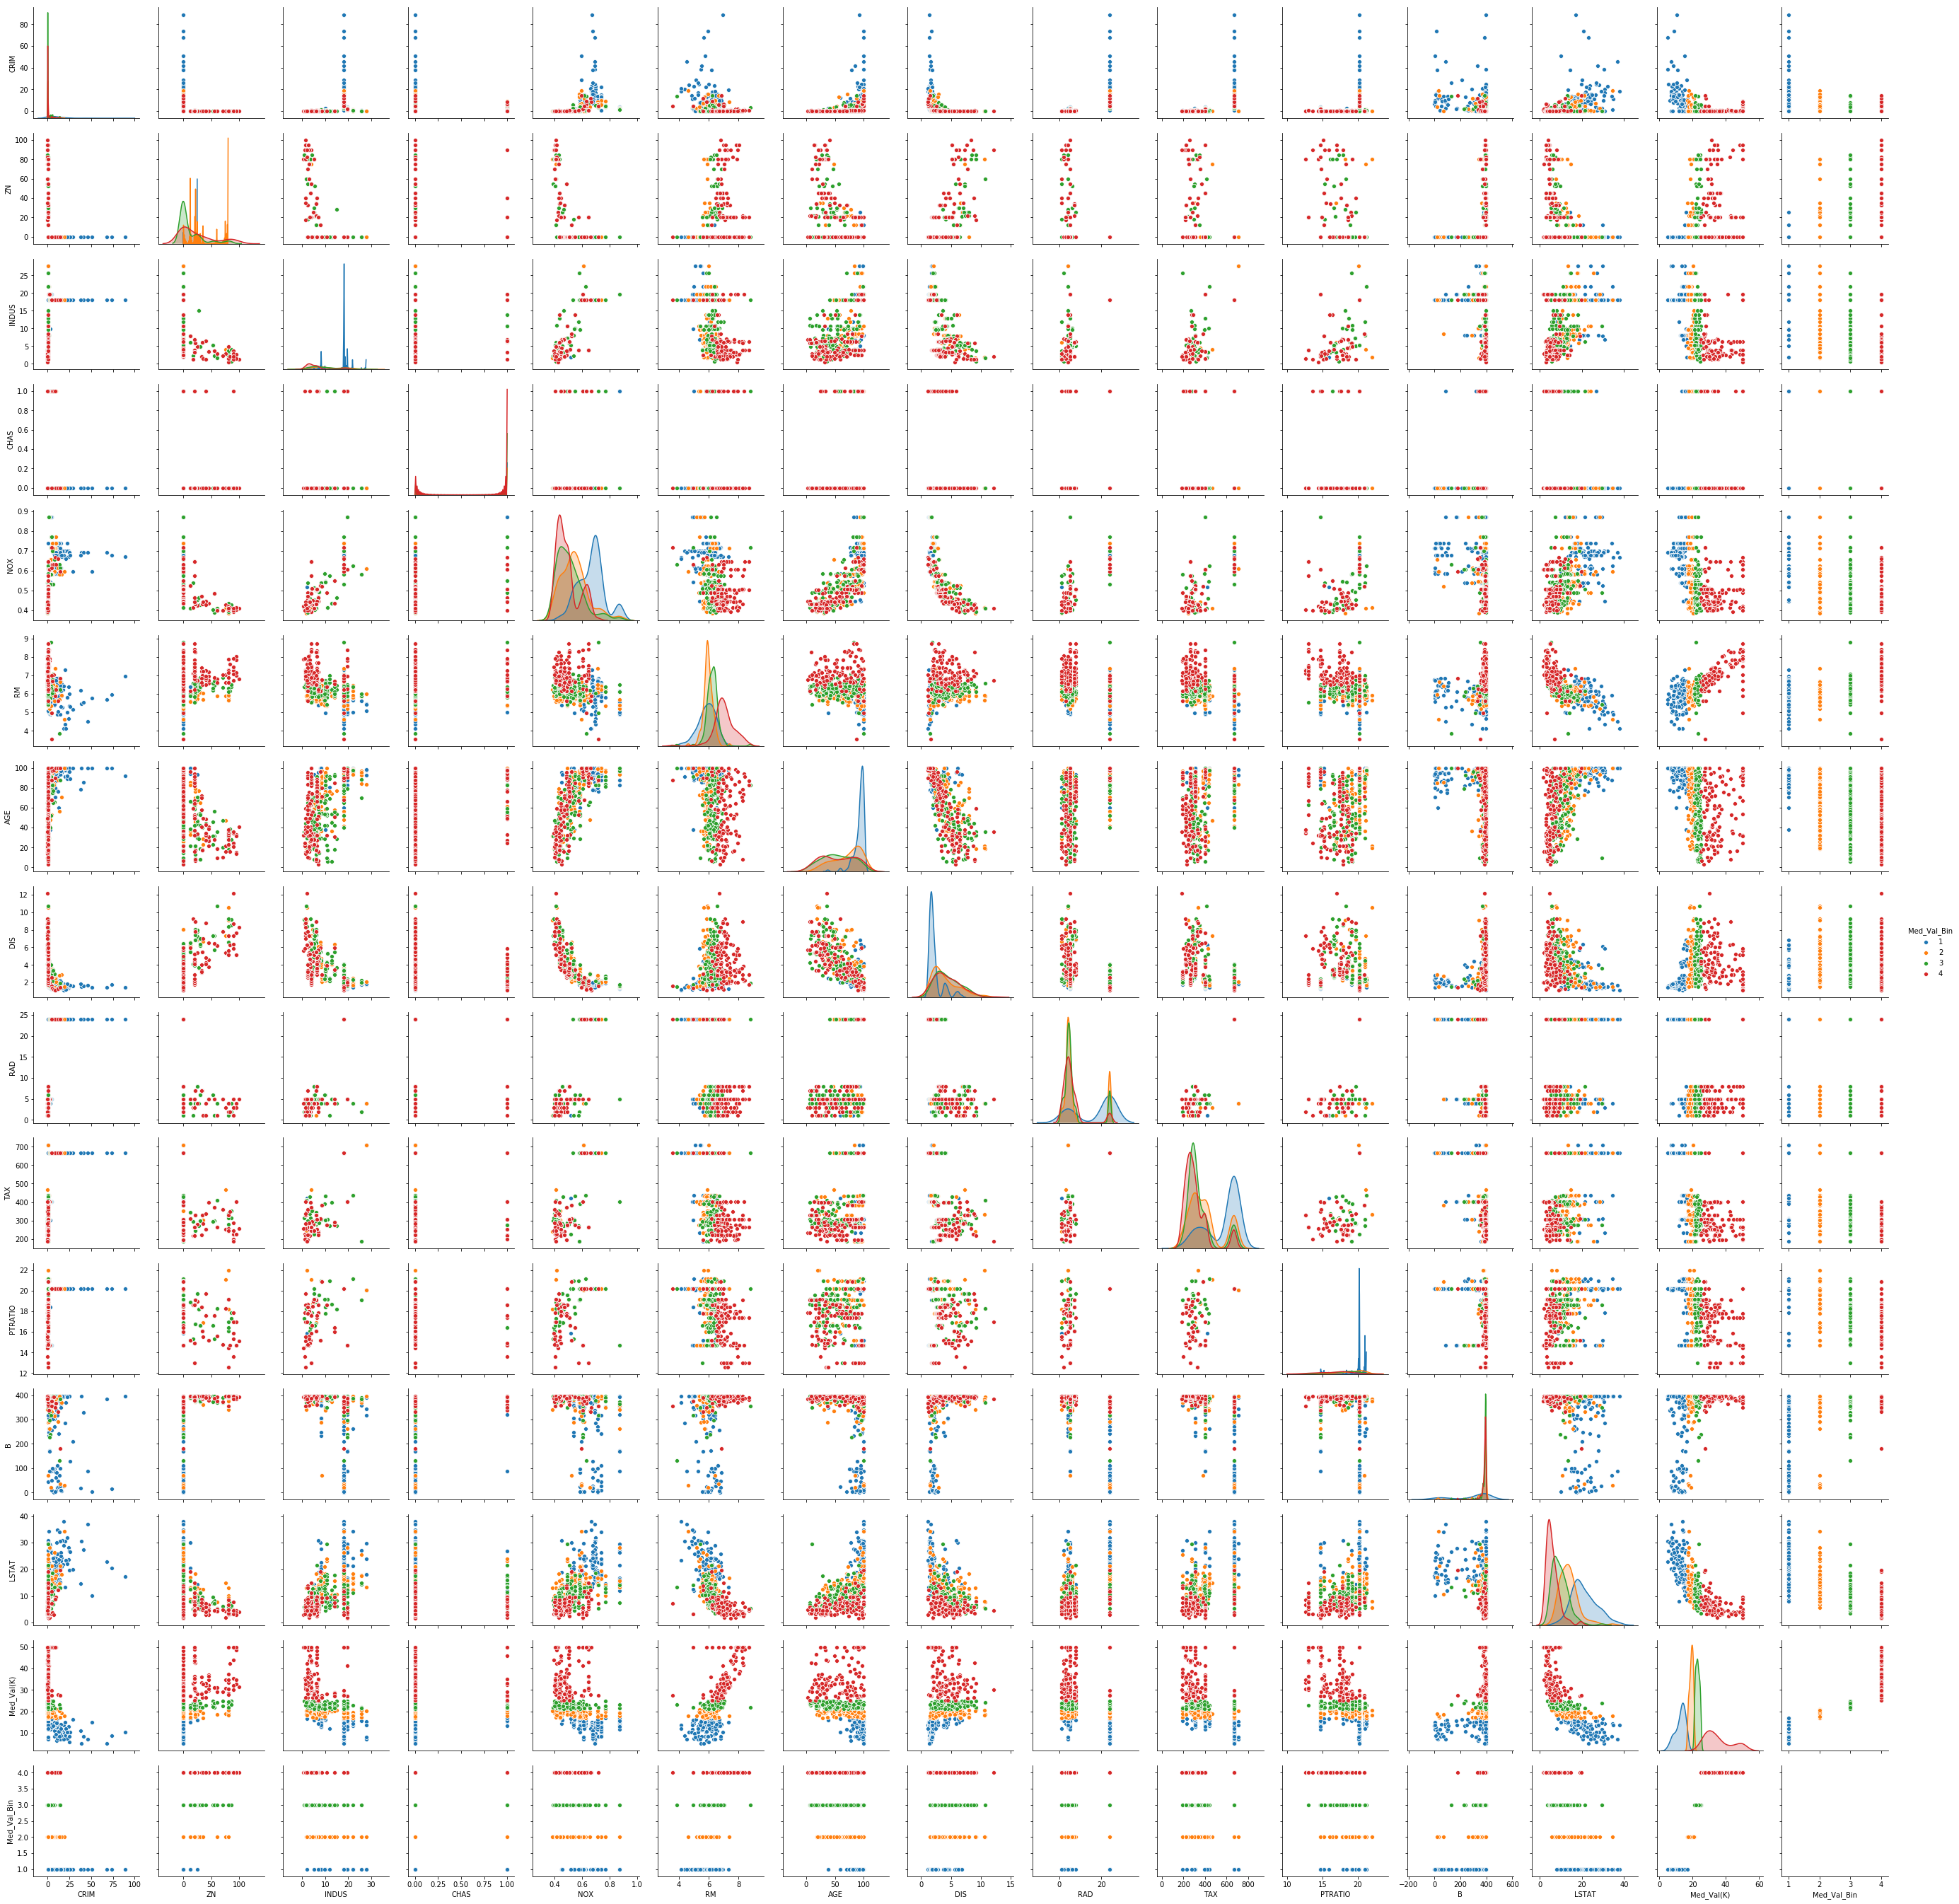

In [23]:
sns.pairplot(df, hue='Med_Val_Bin')

In [11]:
# from plot above it seems reasonable to separate median value low (Med_val<17K) and median value high (Med_val>25K)
df = df[(df['Med_Val_Bin']==1 )|(df['Med_Val_Bin']==4 )]
df['Med_Val_Bin'].replace({1:0,4:1}, inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Med_Val(K),Med_Val_Bin
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,1
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,1
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0
10,0.22489,12.5,7.87,0.0,0.5240,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,0
20,1.25179,0.0,8.14,0.0,0.5380,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02,13.6,0
22,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2,0
23,0.98843,0.0,8.14,0.0,0.5380,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88,14.5,0


# KMean Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

In [45]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Med_Val(K)', 'Med_Val_Bin'],
      dtype='object')

In [46]:
X = df[['LSTAT', 'Med_Val(K)']]
y = df['Med_Val_Bin']

In [47]:
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.predict(X)
centroids = km.cluster_centers_

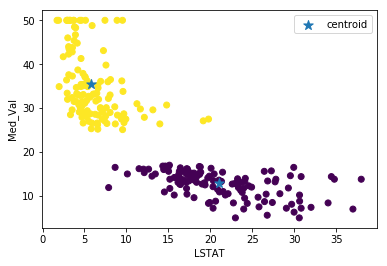

In [48]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, label=None)
plt.scatter(centroids[:,0], centroids[:,1], marker="*", s=[100], label='centroid')
plt.xlabel('LSTAT')
plt.ylabel('Med_Val')
plt.legend(loc='best')
plt.show()

In [49]:
pd.crosstab(y, y_pred, colnames=["Pred"])

Pred,0,1
Med_Val_Bin,,
0,0,127
1,122,2


In [50]:
y_pred = pd.DataFrame(y_pred).replace({0:1,1:0}).values
y_pred = y_pred.ravel()

In [51]:
metrics.accuracy_score(y, y_pred)

0.9920318725099602

# GMM

In [52]:
from sklearn.mixture import GaussianMixture

In [54]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X)
y_pred = gmm.predict(X)
pd.crosstab(y,y_pred)

col_0,0,1
Med_Val_Bin,,
0,127,0
1,2,122


In [55]:
metrics.accuracy_score(y, y_pred)

0.9920318725099602

# Linear Regression

In [66]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.iloc[:,0:1], X.iloc[:,1], test_size=0.3, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lin_r = LinearRegression()

In [70]:
lin_r.fit(X_train, y_train)
y_pred = lin_r.predict(X_test)

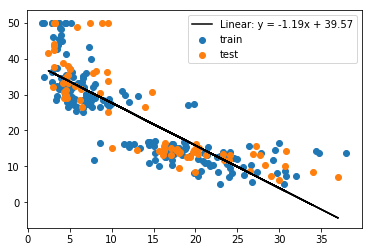

In [71]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_pred, c='k', label='Linear: y = {:.2f}x + {:.2f}'.format(lin_r.coef_[0], lin_r.intercept_))
plt.legend(loc='best')
plt.show()

In [72]:
metrics.r2_score(y_test, y_pred)

0.6925051622102756

# Preprocessing for ML models

In [74]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Med_Val(K)', 'Med_Val_Bin'],
      dtype='object')

In [76]:
X, X_, y = df.iloc[:,:-2], df.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'B', 'Med_Val(K)', 'Med_Val_Bin'],1), df['Med_Val_Bin']

In [78]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
_X_train, _X_test, _y_train, _y_test = model_selection.train_test_split(X_, y, test_size=0.33, random_state=42)

In [80]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
_X_train = scaler.fit_transform(_X_train)
_X_test = scaler.transform(_X_test)

# Logistic Regression, DT, Random Forest, SVM, Naive Bayes, KNN

In [86]:
def train_evaluate(estimator, X_train, y_train, X_test, y_test):
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [88]:
log_r = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [89]:
train_evaluate(log_r, X_train, y_train, X_test, y_test)

1.0

In [90]:
train_evaluate(log_r, _X_train, _y_train, _X_test, _y_test)

0.963855421686747

In [91]:
train_evaluate(dt, X_train, y_train, X_test, y_test)

0.9518072289156626

In [92]:
train_evaluate(rf, X_train, y_train, X_test, y_test)

0.963855421686747

In [93]:
train_evaluate(svc, X_train, y_train, X_test, y_test)

0.9518072289156626

In [94]:
train_evaluate(gnb, X_train, y_train, X_test, y_test)

0.927710843373494

In [95]:
train_evaluate(knn, X_train, y_train, X_test, y_test)

0.963855421686747

In [96]:
train_evaluate(dt, _X_train, _y_train, _X_test, _y_test)

0.927710843373494

In [97]:
train_evaluate(rf, _X_train, _y_train, _X_test, _y_test)

0.927710843373494

In [98]:
train_evaluate(svc, _X_train, _y_train, _X_test, _y_test)

0.9518072289156626

In [99]:
train_evaluate(gnb, _X_train, _y_train, _X_test, _y_test)

0.9397590361445783

In [100]:
train_evaluate(knn, _X_train, _y_train, _X_test, _y_test)

0.9759036144578314

# Use tf.estimator

In [16]:
X, y = df.drop(df.iloc[:,-2:],1), df.iloc[:,-1]

In [19]:
for col in X.columns:
    X[col] = (X[col]-X[col].mean())/X[col].std()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
import tensorflow as tf
feat_cols = [tf.feature_column.numeric_column(key) for key in X.columns]

In [24]:
model = tf.estimator.LinearClassifier(feat_cols,optimizer='Adam')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp57jzefbg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x112264cf8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=32, num_epochs=1000,shuffle=True)

In [26]:
model.train(input_func,steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp57jzefbg/model.ckpt.
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 270.246
INFO:tensorflow:loss = 2.3966973, step = 101 (0.373 sec)
INFO:tensorflow:global_step/sec: 444.403
INFO:tensorflow:loss = 2.7077565, step = 201 (0.225 sec)
INFO:tensorflow:global_step/sec: 418.041
INFO:tensorflow:loss = 7.230823, step = 301 (0.241 sec)
INFO:tensorflow:global_step/sec: 419.574
INFO:tensorflow:loss = 1.9453921, step = 401 (0.237 sec)
INFO:tensorflow:global_step/sec: 414.788
INFO:tensorflow:loss = 1.315513, step = 501 (0.242 sec)
INFO:tensorflow:global_step/sec: 385.737
INFO:tensorflow:loss = 1.2230742, step = 601 (0.258 sec)
INFO:tensorflow:

In [27]:
eval_func = tf.estimator.inputs.pandas_input_fn(X_test, y_test, num_epochs=1, shuffle=False, batch_size=32)

In [28]:
model.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-21-04:33:11
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp57jzefbg/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-21-04:33:12
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.9879518, accuracy_baseline = 0.5060241, auc = 1.0, auc_precision_recall = 1.0, average_loss = 0.01798357, global_step = 5000, label/mean = 0.4939759, loss = 0.49754545, precision = 0.97619045, prediction/mean = 0.5047677, recall = 1.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/yh/6lhz_l7s62scqcgl71hgngx40000gn/T/tmp57jzefbg/model.ckpt-5000


{'accuracy': 0.9879518,
 'accuracy_baseline': 0.5060241,
 'auc': 1.0,
 'auc_precision_recall': 1.0,
 'average_loss': 0.01798357,
 'label/mean': 0.4939759,
 'loss': 0.49754545,
 'precision': 0.97619045,
 'prediction/mean': 0.5047677,
 'recall': 1.0,
 'global_step': 5000}